<a href="https://colab.research.google.com/github/254-KIPSANG/-Image-Processing-and-Fourier-Analysis-with-MATLAB-Visualizing-the-Frequency-Spectrum-of-JPEG-Image/blob/main/Clarke_Error_Grid_Analysis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

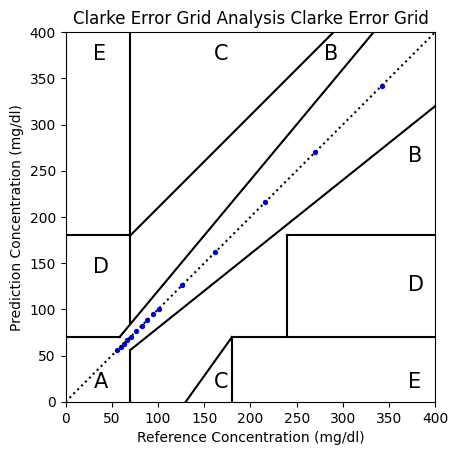

In [1]:
import matplotlib.pyplot as plt

# Define the Clarke Error Grid function
def clarke_error_grid(ref_values, pred_values, title_string):
    """
    Function to plot the Clarke Error Grid.

    Parameters:
    - ref_values: List of reference glucose concentration values.
    - pred_values: List of predicted glucose concentration values.
    - title_string: Title string for the plot.

    Returns:
    - plot: The Clarke Error Grid plot.
    - zone: List of values in each zone (0=A, 1=B, 2=C, 3=D, 4=E).
    """

    # Checking to see if the lengths of the reference and prediction arrays are the same
    assert (len(ref_values) == len(pred_values)), "Unequal number of values (reference : {}) (prediction : {}).".format(len(ref_values), len(pred_values))

    # Clear plot
    plt.clf()

    # Set up plot
    plt.scatter(ref_values, pred_values, marker='o', color='blue', label='Data Points', s=8)
    plt.title(title_string + " Clarke Error Grid")
    plt.xlabel("Reference Concentration (mg/dl)")
    plt.ylabel("Prediction Concentration (mg/dl)")
    plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.gca().set_facecolor('white')

    # Set axes lengths
    plt.gca().set_xlim([0, 400])
    plt.gca().set_ylim([0, 400])
    plt.gca().set_aspect((400)/(400))

    # Plot zone lines
    plt.plot([0,400], [0,400], ':', c='black')                      # Theoretical 45 regression line
    plt.plot([0, 175/3], [70, 70], '-', c='black')
    plt.plot([175/3, 400/1.2], [70, 400], '-', c='black')           # Replace 320 with 400/1.2 because 100*(400 - 400/1.2)/(400/1.2) =  20% error
    plt.plot([70, 70], [84, 400],'-', c='black')
    plt.plot([0, 70], [180, 180], '-', c='black')
    plt.plot([70, 290],[180, 400],'-', c='black')
    plt.plot([70, 70], [0, 56], '-', c='black')                     # Replace 175.3 with 56 because 100*abs(56-70)/70) = 20% error
    plt.plot([70, 400], [56, 320],'-', c='black')
    plt.plot([180, 180], [0, 70], '-', c='black')
    plt.plot([180, 400], [70, 70], '-', c='black')
    plt.plot([240, 240], [70, 180],'-', c='black')
    plt.plot([240, 400], [180, 180], '-', c='black')
    plt.plot([130, 180], [0, 70], '-', c='black')

    # Add zone titles
    plt.text(30, 15, "A", fontsize=15)
    plt.text(370, 260, "B", fontsize=15)
    plt.text(280, 370, "B", fontsize=15)
    plt.text(160, 370, "C", fontsize=15)
    plt.text(160, 15, "C", fontsize=15)
    plt.text(30, 140, "D", fontsize=15)
    plt.text(370, 120, "D", fontsize=15)
    plt.text(30, 370, "E", fontsize=15)
    plt.text(370, 15, "E", fontsize=15)

    # Statistics from the data
    zone = [0] * 5
    for i in range(len(ref_values)):
        if (ref_values[i] <= 70 and pred_values[i] <= 70) or (pred_values[i] <= 1.2*ref_values[i] and pred_values[i] >= 0.8*ref_values[i]):
            zone[0] += 1    # Zone A

        elif (ref_values[i] >= 180 and pred_values[i] <= 70) or (ref_values[i] <= 70 and pred_values[i] >= 180):
            zone[4] += 1    # Zone E

        elif ((ref_values[i] >= 70 and ref_values[i] <= 290) and pred_values[i] >= ref_values[i] + 110) or ((ref_values[i] >= 130 and ref_values[i] <= 180) and (pred_values[i] <= (7/5)*ref_values[i] - 182)):
            zone[2] += 1    # Zone C
        elif (ref_values[i] >= 240 and (pred_values[i] >= 70 and pred_values[i] <= 180)) or (ref_values[i] <= 175/3 and pred_values[i] <= 180 and pred_values[i] >= 70) or ((ref_values[i] >= 175/3 and ref_values[i] <= 70) and pred_values[i] >= (6/5)*ref_values[i]):
            zone[3] += 1    # Zone D
        else:
            zone[1] += 1    # Zone B

    return plt, zone

# Load the dataset
ref_values = [
    342, 270, 216, 162, 126, 100.8,
    94.68, 88.56, 82.44, 76.32, 70.2,
    66.6, 63, 59.4, 55.8
]

# Use the same reference values as prediction values
pred_values = ref_values

# Call the function
plot, zone = clarke_error_grid(ref_values, pred_values, "Clarke Error Grid Analysis")

# Display the plot
plot.show()
